In [5]:
import pandas as pd
import numpy as np
from math import floor
from sklearn import preprocessing
import sklearn
data = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')

# Drop empty values (entire row is empty)
data.dropna(subset=['Culmen Depth (mm)'],inplace=True)

# Drop unnecessary columns
data.drop(['Comments','Region','Stage','Individual ID'],axis = 1,inplace = True)

# Drop empty rows
data.dropna(inplace=True)

In [6]:

data_standardized = sklearn.preprocessing.MinMaxScaler().fit_transform(data)

# Scatter plot: Test K from 2-9

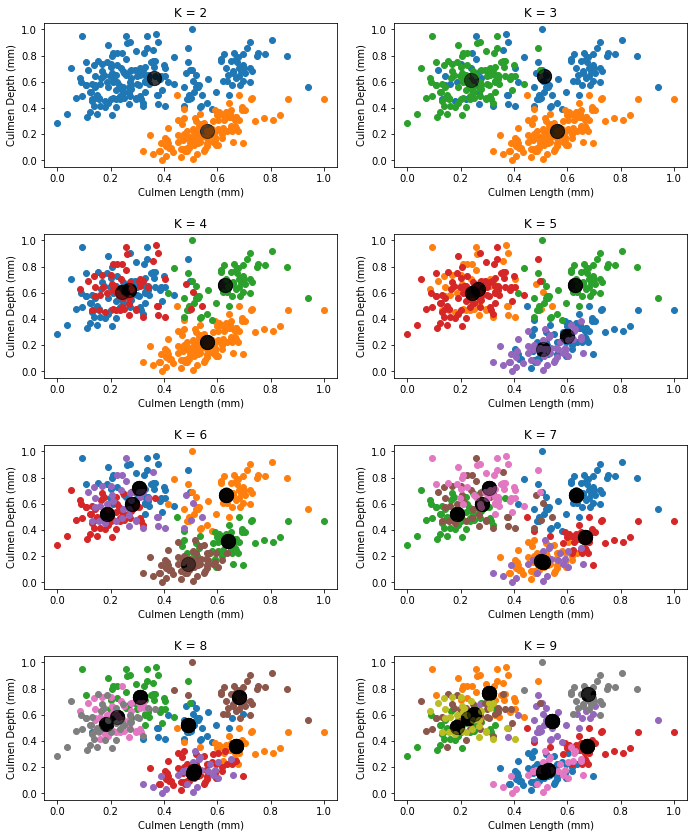

In [7]:
from sklearn import cluster
import matplotlib.pyplot as plt


fig,ax = plt.subplots(nrows = 4,ncols=2,figsize=(10,12)) # total of 8 plots
_inertia = []

for k in range(2,10):
    data_fit = sklearn.cluster.KMeans(n_clusters=k, random_state=0).fit(data_standardized)
    
    _inertia.append(data_fit.inertia_) # store inertia for scree plot
    
    y_kmeans = data_fit.predict(data_standardized)
    for i in range(k): # plot for each cluster
        
        # ======================================
        # There are 6 columns, hence data_filtered will return an array with size of (6,0)
        # This will result in a 6-dimensional data plot, but scatter can only visualize in 2-D
        # Changing the dimension pair allows viewing the clusters from different perespective.
        # ======================================
        
        dimension = [0,1] # viewing perspective
        
        data_filtered = data_standardized[y_kmeans == i] # filter data based on cluster
        # k%2, even = 0, odd = 1
        ax[floor((k-2)/2),k%2].scatter(x=data_filtered[:,dimension[0]],y=data_filtered[:,dimension[1]]) # plot current cluster
        # set title by k value
        ax[floor((k-2)/2),k%2].set_title(f'K = {k}') 
        # plot cluster centers, alpha = 0.5
        ax[floor((k-2)/2),k%2].scatter(data_fit.cluster_centers_[:,dimension[0]], data_fit.cluster_centers_[:,dimension[1]], c='black', s=200, alpha=0.5)
        ax[floor((k-2)/2),k%2].set_xlabel(data.columns[dimension[0]])
        ax[floor((k-2)/2),k%2].set_ylabel(data.columns[dimension[1]])

# widening space between subplots
fig.tight_layout(pad=2.0)
plt.show()

# Generating Scree plot

Text(0.5, 1.0, 'Scree Plot')

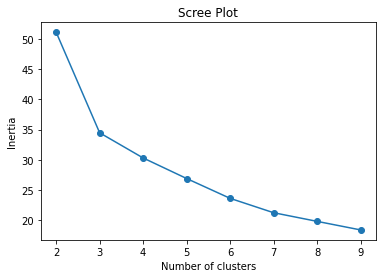

In [10]:
plt.scatter(x=range(2,10),y=_inertia)
plt.plot(range(2,10),_inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot')

# k = 3 for this dataset